# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", None)

---

# Thu thập dữ liệu

**Dữ liệu được sử dụng trong NoteBook này là thông tin về các khách hàng tham gia cuộc khảo sát để tìm ra khách hàng lý tưởng. Để giúp cho doanh nghiệp hiểu tốt hơn về khách hàng**
> **Context**\
**Problem Statement**\
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
>
>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Phần mô tả của dữ liệu:**
>**Attributes**\
**People**
>
>- ID: Customer's unique identifier
>- Year_Birth: Customer's birth year
>- Education: Customer's education level
>- Marital_Status: Customer's marital status
>- Income: Customer's yearly household income
>- Kidhome: Number of children in customer's household
>- Teenhome: Number of teenagers in customer's household
>- Dt_Customer: Date of customer's enrollment with the company
>- Recency: Number of days since customer's last purchase
>- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
>
>**Products**
>
>- MntWines: Amount spent on wine in last 2 years
>- MntFruits: Amount spent on fruits in last 2 years
>- MntMeatProducts: Amount spent on meat in last 2 years
>- MntFishProducts: Amount spent on fish in last 2 years
>- MntSweetProducts: Amount spent on sweets in last 2 years
>- MntGoldProds: Amount spent on gold in last 2 years
>
>**Promotion**
>
>- NumDealsPurchases: Number of purchases made with a discount
>- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
>
>**Place**
>
>- NumWebPurchases: Number of purchases made through the company’s website
>- NumCatalogPurchases: Number of purchases made using a catalogue
>- NumStorePurchases: Number of purchases made directly in stores
>- NumWebVisitsMonth: Number of visits to company’s website in the last month

**Dữ liệu này được Public trên trang Kaggle nhằm mục đích học tập với license như sau:**
> License CC0: Public Domain


**Cám ơn [LavanyaAkash Patel](https://www.kaggle.com/imakash3011) đã cung cấp tập dữ liệu này**


**Mình download dữ liệu tại đây [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)**

---

# Khám phá dữ liệu

## Đọc dữ liệu từ file .csv

In [2]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t')

In [3]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t') # mkt = marketing
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
mkt_df_nrows, mkt_df_ncols = mkt_df.shape
print(f"Marketing dataset have {mkt_df_nrows} rows and {mkt_df_ncols} columns")

Marketing dataset have 2240 rows and 29 columns


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo Kaggle, mỗi dòng là thông tin cá nhân + thông tin mua hàng của 1 khách hàng. Nhìn chung các dòng có cùng ý nghĩa với nhau

## Dữ liệu có các dòng bị lặp không?

In [5]:
num_duplicated_apps = mkt_df.duplicated().sum()
num_duplicated_ids = mkt_df['ID'].duplicated().sum()

print(f"Number of duplicated rows in Marketing dataset: {num_duplicated_apps}")
print(f"Number of duplicated ids in Marketing dataset: {num_duplicated_ids}")

Number of duplicated rows in Marketing dataset: 0
Number of duplicated ids in Marketing dataset: 0


$\to$ Các dòng không bị trùng nhau hoàn toàn hoặc trùng nhau về ID

## Mỗi cột có ý nghĩa gì?

Ý nghĩa của các cột được lưu vào file `columns_explain.csv`, ta sẽ đọc file này vào 1 dataframe gồm 2 cột tên là `Attribute` và `Meaning`

In [6]:
pd.set_option('display.max_colwidth', None) # in đầy đủ thông tin, thay vì "..." 
pd.read_csv('../Data/columns_explain.csv', sep='\t', names = ['Attribute', 'Meaning'])

,Attribute,Meaning
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,Complain,"1 if the customer complained in the last 2 years, 0 otherwise"


Thấy rằng tổng cộng có 29 thuộc tính nhưng chỉ có 27 thuộc tính được mô tả, thiếu 2 thuộc tính `Z_CostContact` và `Z_Revenue`. Vì không rõ ý nghĩa của 2 thuộc tính này nên nhóm quyết định bỏ đi 2 cột này. Mặt khác, chính tác giả trong 1 bài discussion trên kaggle cũng nói rằng nên bỏ 2 cột này đi (Link discussion: https://www.kaggle.com/imakash3011/customer-personality-analysis/discussion/267556)

In [7]:
# bỏ đi 2 cột
mkt_df = mkt_df.drop(columns=['Z_CostContact', 'Z_Revenue'])
len(mkt_df.columns)

27

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
mkt_df.dtypes.to_frame(name='type')

,type
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


Cột `Dt_Customer` nên có kiểu dữ liệu dạng ngày tháng, nhưng hiện giờ đang có kiểu dữ liệu `object`. Ta hãy thử tìm hiểu về các giá trị của cột này.

In [9]:
mkt_df["Dt_Customer"].sample(10)

1459    14-09-2012
555     12-09-2012
264     03-02-2013
254     29-08-2012
2239    15-10-2012
806     23-03-2014
1925    05-09-2013
600     21-02-2013
1109    31-05-2014
1414    13-02-2013
Name: Dt_Customer, dtype: object

Ta nên đưa cột này về dạng `datetime` để có thể tiếp tục khám phá (tính min, max, median,...)

---

# Tiền xử lý

In [10]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')

Xem lại kiểu dữ liệu của cột `Dt_Customer`

In [11]:
mkt_df["Dt_Customer"].dtype

dtype('<M8[ns]')

## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 

- Nhóm cột numeric = tất cả các cột - [`ID`, `Education`, `Marital_Status`]. Lưu ý: xếp cột `Dt_Customer` có kiểu DateTime vào nhóm các cột numeric luôn
- Với mỗi cột numeric, tính các giá trị sau và xuất ra dưới dạng DataFrame:
    - `missing_ratio`: Tỉ lệ % giá trị thiếu (từ 0 đến 100)
    - `min`
    - `max`
    - `nunique`: số lượng các phần tử khác nhau (unique) của từng cột 

In [12]:
nume_cols = mkt_df.select_dtypes([np.int64, np.float64, np.datetime64]).columns[1:] # bỏ index 0, tức cột ID
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)
mkt_df[nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
missing_ratio,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1893.0,1730.000000,0.0,0.0,2012-07-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1996.0,666666.000000,2.0,2.0,2014-06-29 00:00:00,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
nunique,59.0,1974.000000,3.0,3.0,663,100.0,776.0,158.0,558.0,182.0,177.0,213.0,15.0,15.0,14.0,14.0,16.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


$\to$ Cột `Year_Birth` có min là 1893, tức nếu năm nay là năm 2021 thì người này đã được 128 tuổi ! Trong bối cảnh phân tích thì cần loại bỏ đi những khách hàng đã quá 100 tuổi 

$\to$ Cột `Income` thiếu khoảng 1% giá trị cột. Vì khá ít nên quyết định bỏ đi những mẫu thiếu `Income`

## Tiền xử lý

Xóa những khách hàng đã quá 100 tuổi

In [13]:
mask = 2021 - mkt_df['Year_Birth'] >= 100
mkt_df.drop(mkt_df[mask].index, inplace=True)

Kiểm tra lại độ tuổi nhỏ nhất của khách hàng

In [14]:
2021 - mkt_df['Year_Birth'].min()

81

Xóa các dòng có chứa giá trị bị thiếu ở cột `Income`

In [15]:
mask = mkt_df["Income"].isna()
mkt_df.drop(mkt_df[mask].index, inplace=True)

Kiểm tra lại cột `Income`

In [16]:
mkt_df["Income"].isna().sum()

0

---

# Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Lấy ra các cột dữ liệu không phải dạng số

In [17]:
cat_cols = mkt_df.select_dtypes(include=["object"])

Tên của các cột

In [18]:
cat_cols.columns

Index(['Education', 'Marital_Status'], dtype='object')

Xem giá trị missing_ratio, min và max của các cột không phải dữ liệu numeric

In [19]:
def min(df:pd.DataFrame):
    return df.value_counts().idxmin()

def max(df:pd.DataFrame):
    return df.value_counts().idxmax()

cat_cols.apply([missing_ratio, min, max])

,Education,Marital_Status
missing_ratio,0.0,0.0
min,Basic,Absurd
max,Graduation,Married


Visualize để xem rõ hơn về phân bố của các giá trị này

- cột `Education`

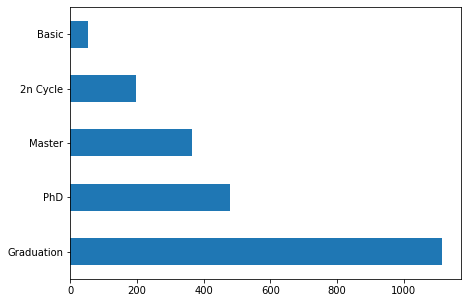

In [20]:
cat_cols["Education"].value_counts().plot.barh(figsize=(7,5));

- cột `Marital_Status`. Đầu tiên, coi thử các giá trị unique của cột này

In [21]:
cat_cols["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Vể mặt ngữ nghĩa, dễ thấy rằng các giá trị cột này thực chất có thể phân vào 2 nhóm: 
- `Married`: Married, Together
- `Single`: Single, Divorced, Widow, Alone, Absurd, YOLO (You Only Live Once)

In [22]:
# Lương's code here (sau khi phân xong, nên vẽ 1 biểu đồ thể hiện % của từng nhóm)

# Đặt câu hỏi 

In [23]:
mkt_df.shape

(2213, 27)

Phân bố của 1 số thuộc tính

<AxesSubplot:ylabel='Frequency'>

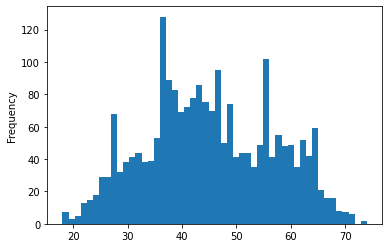

In [24]:
age_sr = 2014 - mkt_df['Year_Birth']
age_sr.plot.hist(bins=50)

In [25]:
mkt_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
...,...,...,...
2235,9,3,4
2236,8,2,5
2237,2,3,13
2238,6,5,10
